### car_mpg_xls
이상치 정제

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
xls = pd.ExcelFile('../../data/car_mpg.xlsx')

In [5]:
data_df = xls.parse(xls.sheet_names[0])
data_df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


구동방식 별 고속도로 연비 평균과 도시연비 평균을 
극단치를 제외하고 확인  
각 연비 별 이상치 확인 boxplot()

<function matplotlib.pyplot.show(*args, **kw)>

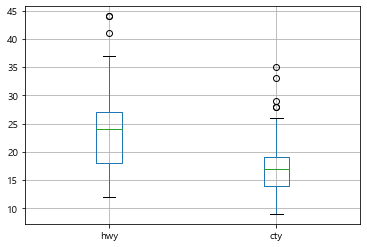

In [6]:
outlier_df = data_df[['hwy', 'cty']]
outlier_df.boxplot()
plt.show

In [7]:
# 3사분위, 1사분위 알아보기
q75 = outlier_df.quantile(q=0.75)
q25 = outlier_df.quantile(q=0.25)
print(q75)
print(q25)

hwy    27.0
cty    19.0
Name: 0.75, dtype: float64
hwy    18.0
cty    14.0
Name: 0.25, dtype: float64


In [8]:
# iqr 알아보기
iqr = q75 - q25
iqr

hwy    9.0
cty    5.0
dtype: float64

In [9]:
# 최고한계치(upper fence), 최저 한계치(lower fence)알아보기
upper_fence = q75 + 1.5*iqr
lower_fence = q25 - 1.5*iqr

print(upper_fence)
print(lower_fence)

hwy    40.5
cty    26.5
dtype: float64
hwy    4.5
cty    6.5
dtype: float64


In [10]:
# 극단치 경계 (upper)

upper_outlier = outlier_df[outlier_df < upper_fence].max()
upper_outlier

hwy    37.0
cty    26.0
dtype: float64

In [11]:
# 극단치 경계 (lower)

lower_outlier = outlier_df[outlier_df > lower_fence].min()
lower_outlier

hwy    12
cty     9
dtype: int64

In [12]:
# 이상치를 결측값으로 변경

hwy_outlier_df = data_df.query('hwy>'+str(upper_outlier['hwy']))
hwy_outlier_df


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [13]:
cty_outlier_df = data_df.query('cty>'+str(upper_outlier['cty']))
cty_outlier_df


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [14]:
outlier_clean_df = data_df.copy()
outlier_clean_df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
# hwy 연비에 대한 이상치를 결측값으로 변경

for idx in hwy_outlier_df.index:
    outlier_clean_df.loc[idx, 'hwy'] = np.nan
outlier_clean_df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact


In [16]:
# cty 연비에 대한 이상치를 결측값으로 변경
for idx in cty_outlier_df.index:
    outlier_clean_df.loc[idx, 'cty'] = np.nan
outlier_clean_df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18.0,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21.0,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20.0,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21.0,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16.0,26.0,p,compact


In [17]:
outlier_clean_df.isna().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             3
fl              0
class           0
dtype: int64

In [18]:
# 결측값 제거한 구동방식 별 고속도로, 도시 연비 평균

outlier_clean_df.groupby('drv')[['hwy', 'cty']].mean()

,hwy,cty
drv,,
4,19.174757,14.330097
f,27.728155,19.445545
r,21.000000,14.080000


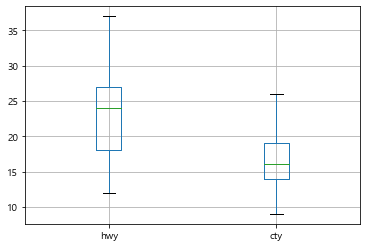

In [19]:
outlier_clean_df[['hwy', 'cty']].boxplot()

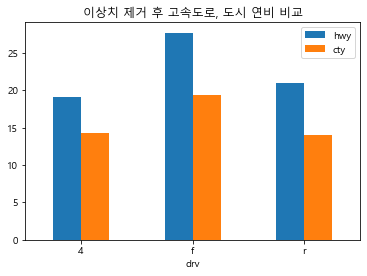

In [20]:
# 이상치 제거 후 고속도로, 도시 연비 비교


outlier_clean_df.groupby('drv')[['hwy', 'cty']].mean().plot.bar(rot=0)
plt.title('이상치 제거 후 고속도로, 도시 연비 비교')
plt.show()

### visualization[02- 실습]

- 데이터 빈도 (히스토그램, 박스)
- 데이터 전처리
- 변수 검토
- 변수간 관계 분석 및 시각화

데이터 가져오기

- xls = pd.ExcelFile('경로/파일명')
- kowebs_df = xls.parse(xls.sheet_names[0])
- data_df = kowebs_df.copy()

In [21]:
xls = pd.ExcelFile('../../data/koweps_visualization.xlsx')

In [22]:
koweps_df = xls.parse(xls.sheet_names[0])

In [23]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


데이터프레임에서 사용하고자 하는 컬럼만 추출하여 rename

In [25]:
new_df = data_df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
new_df.head()

,h12_g3,h12_g4,h12_g10,h12_g11,h12_eco9,p1202_8aq1,h12_reg7
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [26]:
new_df.columns = ['성별', '태어난연도', '혼인상태', '종교', '직종', '월임금', '지역']
new_df.head()

,성별,태어난연도,혼인상태,종교,직종,월임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [27]:
# 성별의 데이터 분포 확인
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      15422 non-null  int64  
 1   태어난연도   15422 non-null  int64  
 2   혼인상태    15422 non-null  int64  
 3   종교      15422 non-null  int64  
 4   직종      7131 non-null   float64
 5   월임금     4507 non-null   float64
 6   지역      15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


In [28]:
new_df.describe()

,성별,태어난연도,혼인상태,종교,직종,월임금,지역
count,15422.000000,15422.000000,15422.000000,15422.000000,7131.000000,4507.000000,15422.000000
mean,1.547270,1968.436195,1.692906,1.526650,588.500070,257.950073,3.727013
std,0.497777,24.321489,1.584766,0.499305,260.129813,192.706107,2.069895
min,1.000000,1907.000000,0.000000,1.000000,111.000000,0.000000,1.000000
25%,1.000000,1947.000000,1.000000,1.000000,313.000000,135.000000,2.000000
50%,2.000000,1967.000000,1.000000,2.000000,611.000000,208.000000,3.000000
75%,2.000000,1989.000000,2.000000,2.000000,873.000000,336.000000,6.000000
max,2.000000,2016.000000,6.000000,2.000000,1012.000000,1874.000000,7.000000


In [29]:
# 성별을 비율순으로 정렬
gender_count = new_df['성별'].value_counts()
gender_count_df = pd.DataFrame(gender_count)
gender_count_df

,성별
2,8440
1,6982


In [30]:
gender_count_df.rename(columns = {'성별':'명'}, inplace = True)
gender_count_df

,명
2,8440
1,6982


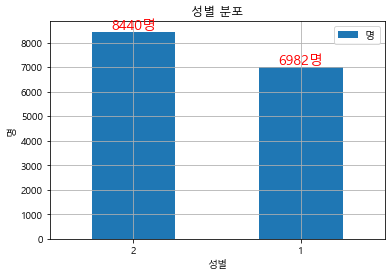

In [31]:
# 데이터 시각화
gender_count_df.plot.bar(rot = 0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')
for idx, values in enumerate(list(gender_count_df['명'])):
    txt='%d명' %values
    plt.text(idx, values, txt,
            horizontalalignment = 'center',
            verticalalignment = 'bottom',
            fontsize = 14,
            color = 'red')
plt.show()

In [32]:
# 지역으로
new_df['지역'].value_counts()

2    3492
7    2749
3    2564
1    2208
4    1874
5    1355
6    1180
Name: 지역, dtype: int64

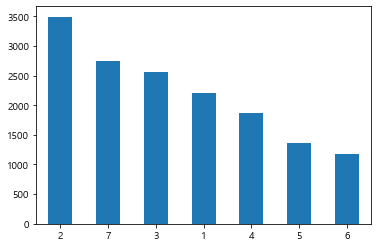

In [33]:
new_df['지역'].value_counts().plot.bar(rot=0)

In [49]:
# 성별에 따른 임금 평균
gender_salary = new_df.groupby('성별')['월임금'].mean()
gender_salary_df = pd.DataFrame(gender_salary)
gender_salary_df.loc[1, 'gender'] = '남자'
gender_salary_df.loc[2, 'gender'] = '여자'
gender_salary_df = gender_salary_df.set_index('gender')
gender_salary_df

,월임금
gender,
남자,333.280785
여자,175.293108


In [52]:
gender_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 남자 to 여자
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월임금     2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes


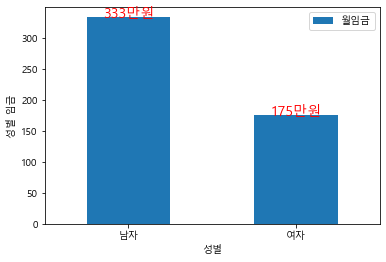

In [56]:
gender_salary_df.plot.bar(rot = 0)
plt.xlabel('성별')
plt.ylabel('성별 임금')

for idx, value in enumerate(list(gender_salary_df['월임금'])):
    txt = '%d만원' %value
    plt.text(idx, value, txt,
            horizontalalignment = 'center',
            fontsize = 14,
            color='red')
plt.show()

In [59]:
# gender_count_df를 piechart로
gender_count_df.loc[2, '성별'] = '여자'
gender_count_df.loc[1, '성별'] = '남자'
gender_count_df = gender_count_df.set_index('성별')
gender_count_df

,명
성별,
여자,8440
남자,6982


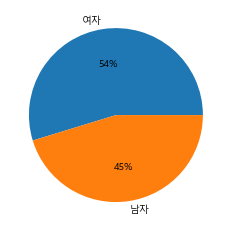

In [62]:
plt.pie(gender_count_df['명'],
       labels = gender_count_df.index,
       autopct = "%d%%")

plt.show()

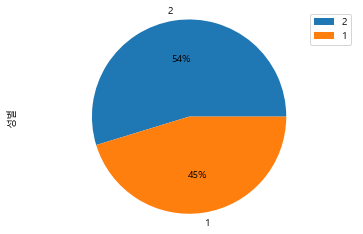

In [65]:
# df.plot.pie 불가능
# series.plot.pie(labels = series.index)

gender_count.plot.pie(autopct = '%d%%',
                     legend = True,
                     labels = gender_count.index)
plt.axis('equal')
plt.show()

## Visualization[02]
(이거 먼저 하고 실습 복습해야하는데 모르고 실습부터 했다)

### Pie Chart
카테고리 별 값의 상대적 비교를 해야할 경우

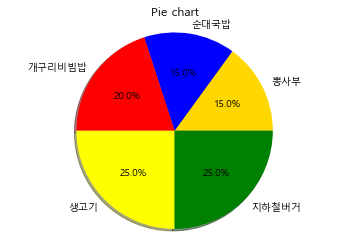

In [68]:
labels = ['뽕사부', '순대국밥', '개구리비빔밥', '생고기', '지하철버거']
sizes = [15, 15, 20, 25, 25]
colors = ['gold', 'blue', 'red', 'yellow', 'green']

plt.title("Pie chart")
plt.pie(sizes, 
        labels = labels, 
        colors = colors,
       shadow = True,
       autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

`plt.pie()`
- size - 데이터,
- label - 라벨
- autopct - 차트 안에 값 입력
- `plt.axis('equal')` 모양 제대로 맞춰준다

### histogram
구간에 대한 데이터 집계를 시각화할 때

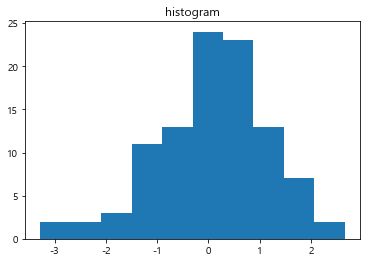

In [70]:
data = np.random.randn(100)
data
plt.title('histogram')
plt.hist(data, bins=10)
plt.show()

`plt.hist()`
- data
- bins = 10 :10개의 구간으로 나눈다

### scatter plot
- 2차원 데이터
- 데이터 집합의 상관관계를 살펴보기 위함

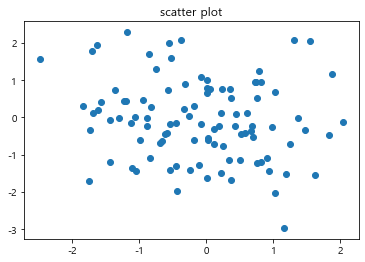

In [71]:
np.random.seed(100)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)

plt.title('scatter plot')
plt.scatter(X, Y)
plt.show()

np.random.normal(0, 1, 100)
- np.random.normal : 정규분포를 띄는 난수를 발생
- np.random.normal(0, 1, 100)
: 평균이 0, 표준편차가 1인 100개의 난수를 발생시킨다

np.random.rand
- 0부터 1까지의 수 중 균일 분포를 띄는 난수 발생

np.random.randn
- 표준정규분포를 띄는 난수 발생


### bubble chart

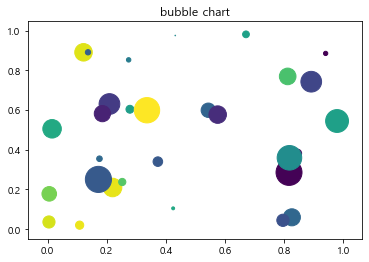

In [79]:
np.random.seed(100)
X = np.random.rand(30)
Y1 = np.random.rand(30)
Y2 = np.random.rand(30)
Y3 = np.pi*(15*np.random.rand(30))**2

plt.title('bubble chart')
plt.scatter(X, Y1, c = Y2, s = Y3)
plt.show()


`plt.scatter`
- s : size
- c : color

### DataFrame 시각화

In [97]:
np.random.seed(10)
sample_df = pd.DataFrame(np.random.randn(100,3),
                        index = pd.date_range('1/1/2020', periods = 100),
                        columns = ['A', 'B', 'C'])
sample_df.head()

,A,B,C
2020-01-01,1.331587,0.715279,-1.545400
2020-01-02,-0.008384,0.621336,-0.720086
2020-01-03,0.265512,0.108549,0.004291
2020-01-04,-0.174600,0.433026,1.203037
2020-01-05,-0.965066,1.028274,0.228630


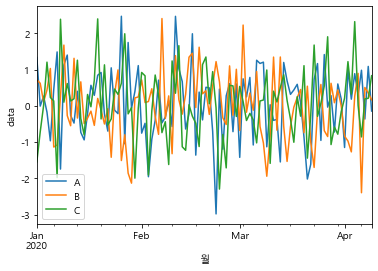

In [100]:
sample_df.plot()
plt.xlabel('월')
plt.ylabel('data')
plt.show()

### iris 시각화

In [101]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


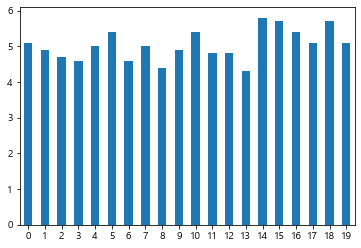

In [104]:
# 첫 20 행의 sepal_length 시각화
iris.sepal_length[:20].plot.bar(rot=0)

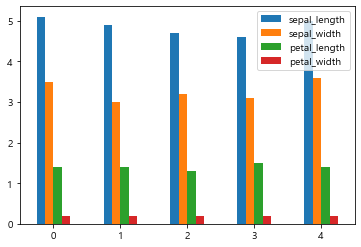

In [106]:
# iris 첫 5행의 SL, SW, PL, PW 시각화
iris[:5].plot.bar(rot = 0)

df.plot.bar() : 알아서 수치화된 데이터만 시각화해준다

In [109]:
# 그룹분석으로 각 붓꽃 종의 평균을 구하고 시각화 한다면?
iris_group_df = iris.groupby('species').mean()
iris_group_df

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


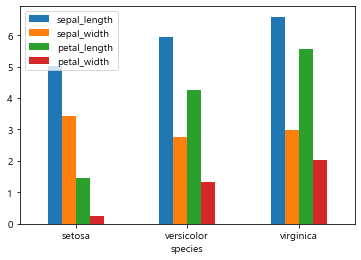

In [110]:
iris_group_df.plot.bar(rot=0)

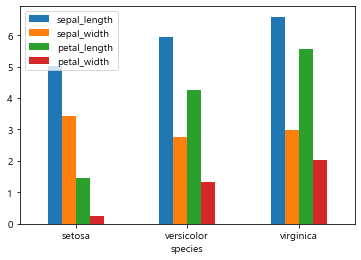

In [115]:
iris_group_df.plot(kind='bar', rot=0)

똑같다
`iris.plot.bar()` 
`iris.plot(kind = 'bar')`

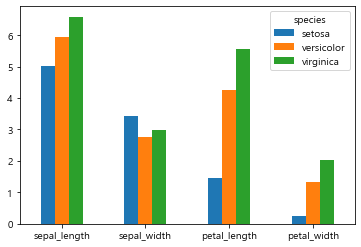

In [118]:
# 종 별 말고 컬럼 별로 종을 확인해보려면
iris_group_df.T.plot(kind = 'bar', rot =0)
plt.show()

### 타이타닉으로 pie, hist, box, scatter

In [120]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [123]:
# 선실 별 승객 수 파이차트로 구현

pclass = titanic['pclass'].value_counts()

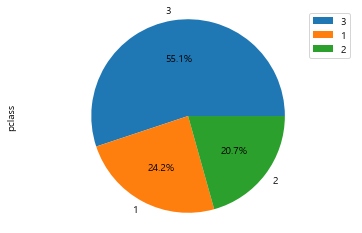

In [131]:
pclass.plot.pie(autopct = '%1.1f%%',
               legend = True)
plt.axis('equal')
plt.show()

### autopct 사용법
- `%0.2f` 소숫점 두번째 자리까지 보여준다
- `%0.2f%%` 소숫점 두번째 자리까지 보여주고 맨 뒤에 % 기호를 붙인다.
- `%d%%` 가장 가까운 정수로 반올림하고 맨 뒤에 % 기호를 붙인다

갑자기 iris 종 별 histogram

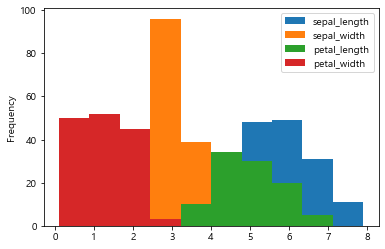

In [132]:
iris.iloc[:,[0,1,2,3]].plot.hist()

KDE (kernerl Density Plot) - iris 데이터

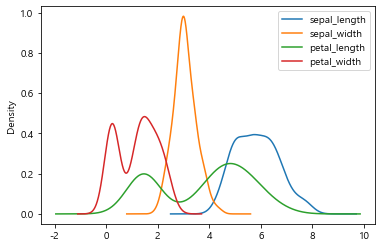

In [134]:
iris.plot.kde()
plt.show()

boxplot

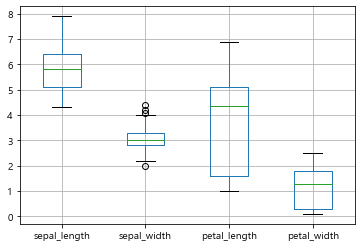

In [136]:
iris.boxplot()
plt.show()

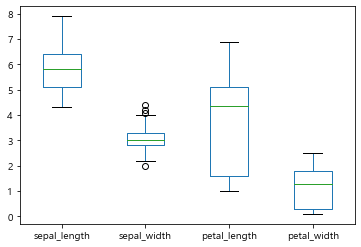

In [137]:
iris.plot.box()
plt.show()